# Adaptive Intelligence COM3240
## Lab 2: The BCM rule

### Learning Outcomes

- Understand the BCM rule and its functionality.
- Understand the difference between Hebbian rule and BCM rule.

## Lecture overview

Experimental evidence: both pre- and postsynaptic activity is needed in order for the synaptic weight to change.
 
BCM rule equation:  
$$ \frac{dw_{i,j}}{dt} = a_2^{corr} \Phi \left( v_i^{post}; \theta \right) v_j^{pre} $$
where $ \frac{dw_{i,j}}{dt}$ is the rate of change of weight **from** a presynaptic neuron $j$ and **to** a postsynaptic neuron $i$ , $a_2^{corr}$ is the learning rate (the amount of weight change over time in case of firing), $\Phi$ is a nonlinear function dependent of a threshold $\theta$ and the postsynaptic activity $v_i^{post}$, and $v_j^{pre}$ is the activity of the presynaptic neuron.



The BCM rule leads to specialized Neurons (developmental learning).

<img src='http://bitsandchips.me/COM3240_Adaptive_Intelligence/Lecture2/icons/fig1.png' width="500">

With **a sliding threshold** $\theta$, the BCM rule implements competition between synapses.

The firing rates of neurons (whether pre- post-synaptic) are in Hz. $\theta$ is the threshold of firing rates so it must also be in Hz.

Theta is a function of the averge post synaptic neuron vector over time.
$$\theta = f\left(\left<v^{post}_i\right>\right)$$

## Laboratory 2: The BCM rule

### Exercise: Implementation of the BCM rule

Write a script that simulates the following scenarios and verify your result using logic argument. Note: choice of parameters may affect your results.
Synaptic changes follow equation, according to the BCM rule:

\begin{align}
\frac{dw_{i,j}}{dt} &= a_2^{corr} \Phi \left( v_i^{post}; \theta \right) v_j^{pre} && [1] \\
\Phi\left(v_i^{post}; \theta\right) &= v_i^{post}\left(v_i^{post} - \theta\right) && [2]  
\end{align}

The synaptic changes are plotted as a function of the postsynaptic firing rate:

<img src="http://bitsandchips.me/COM3240_Adaptive_Intelligence/Lecture2/icons/fig2.png" width="500">

Let us assume the simplest dependence of the postsynaptic firing rate from the input current:
$$ v_i^{post} = \sum_j w_{i, j}v_j^{pre} [3] $$

and consider a postsynaptic neuron that receives input from 2 groups. Each group has 10 neurons and all weights are equal 1. If $\theta = 20 Hz$ consider the following three scenarios:

1. Group 1 fires at 3 Hz, then group 2 at 1 Hz. What happens?
2. Group 1 fires at 3 Hz, then group 2 at 2.5 Hz. What happens?
3. As in 2., but make theta a function of the averaged rate. What happens?

To reply to these questions you will need to implement the BCM rule in the following script.

In [6]:
# loading the libraries
import numpy as np                # docs.scipy.org/doc/numpy-1.10.0/reference/
import matplotlib.pyplot as plt   # matplotlib.org/api/pyplot_summary.html
import matplotlib

%matplotlib inline

#### Parameters and initialization

In [7]:
moving_thres = True

# neuron count
G1 = 10     # group 1
G2 = 10     # group 2
N = G1 + G2 # total

# firing rates
fG1 = 3     #Hz i.e. sec^-1
fG2 = 1
theta = 20  # threshold

# max/min weights
maxW = 2
minW = -2
alpha = 1E-3

# number of iterations over which the weight change will be computed
iterations = 40

# weights -> we store the weight for each iteration in a row of a matrix
#            so that we can plot the weight evolution below
W = np.zeros((iterations, N))
initW = 1
# initialise first row of weights
W[0,:] = initW

#### Input 

In [8]:
np.set_printoptions(linewidth=96)

# input activity
X = np.zeros((iterations, N))
# same as iterations/2 as python integer division returns floor
# http://python-history.blogspot.it/2010/08/why-pythons-integer-division-floors.html
midpoint = np.floor(iterations/2)
# we need to make sure that "midpoint" is integer because we are going to use it as index.
# if we skip this step then: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
midpoint = int(midpoint)

# 1st half: first group active (second  silent)
X[0:midpoint, 0:G1] = fG1       # remember indexing is start-point(included):end-point(not-included)
X[0:midpoint, G1:N+1] = 0

# 2nd half: second group active
X[midpoint:iterations+1, 0:G1] = 0
X[midpoint:iterations+1, G1:N+1] = fG2

####  BMC rule implementation and execution

In [9]:
#Initialize vector for post-synaptic neuron (40 zeroes).
y = np.zeros((1, iterations))

for i in range(iterations - 1):

    # Moving threshold boolean
    if moving_thres:
        # Theta is a function of the averge post synaptic neuron vector over time.
        theta = np.mean(y[:,0:i+1])
    
    """ Implement the given neuron model
    
        The (i+1)th post-synaptic vector entry is equal to the dot product of the (i+1)th row of the weight matrix and the
        transpose of the (i+1)th row of the pre-synaptic matrix."""
    y[0][i] = W[i,:].dot(X[i,:].T)

    """ As specified in [1], the change in weight w - W[i,:] is equal to the product of the learning rate, the function of the
        post-synatpic vector and the theta and the pre-synaptic vector
        
        As pecified in [2], the function is equal to the product of the post-synaptic vector and the difference between each
        entry of the post-synaptic vector  and the threshold."""
    w = W[i,:] + (alpha * (y[0][i] * (y[0][i] - theta))) * X[i,:]
    w = w * (w < maxW) + (w >= maxW) * maxW # synaptic bounds (max)
    w = w * (w > minW) + (w <= minW) * minW # synaptic bounds (min)
    
    W[i+1,:] = w

#### Plotting

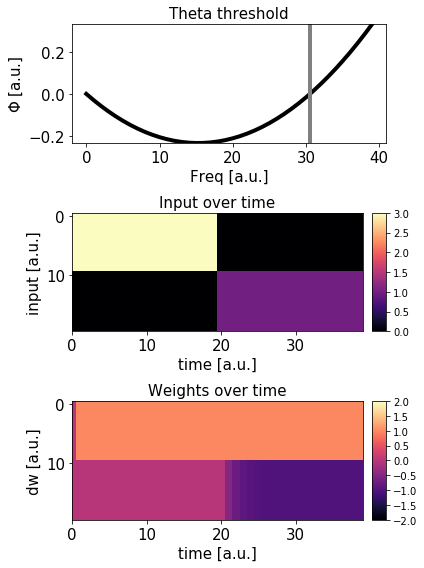

In [10]:

fs = 15
lw = 4
h = 'magma'

fig, axes = plt.subplots(3,1, figsize=(6,8))

# Fig 1 - theta
axes[0].set_title('Theta threshold', fontsize=fs)
y = np.arange(40)
phi = alpha * (y * (y - theta))              # vector * vector is the element-wise multiplication
axes[0].plot(y,phi,'-',color='black', linewidth=lw)
axes[0].plot([theta, theta],[min(phi), max(phi)],'-',color='grey', linewidth=lw)
axes[0].set_xlabel('Freq [a.u.]',fontsize=fs)
axes[0].set_ylabel(r'$\Phi$ [a.u.]',fontsize=fs)    # r makes the string raw (needed for latex rendering)
axes[0].tick_params(axis='both',labelsize=fs)
axes[0].set_ylim(min(phi),max(phi))

# Fig 2 - input
axes[1].set_title('Input over time', fontsize=fs)
im1 = axes[1].imshow(X.T, interpolation='nearest', cmap=h)
axes[1].set_aspect('auto')
axes[1].set_xlabel('time [a.u.]',fontsize=fs)
axes[1].set_ylabel('input [a.u.]',fontsize=fs)
axes[1].tick_params(axis='both',labelsize=fs)
axes[1].set_xlim(0,iterations-1)

# Fig 3 - weight change
axes[2].set_title('Weights over time', fontsize=fs)
im2 = axes[2].imshow(W.T - initW, interpolation='nearest', cmap=h)
axes[2].set_aspect('auto')
axes[2].set_xlabel('time [a.u.]',fontsize=fs)
axes[2].set_ylabel('dw [a.u.]',fontsize=fs)
axes[2].tick_params(axis='both',labelsize=fs)
axes[2].set_xlim(0,iterations-1)

# Position the colorbars to the right of the images
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider1 = make_axes_locatable(axes[1])
divider2 = make_axes_locatable(axes[2])
cbar_ax1 = divider1.append_axes("right", "5%", pad="3%")
cbar_ax2 = divider2.append_axes("right", "5%", pad="3%")
cm1 = fig.colorbar(im1, cax=cbar_ax1)
cm2 = fig.colorbar(im2, cax=cbar_ax2)

# Set the color range for the images and colorbars
minX = X.min()
maxX = X.max()
im1.set_clim(vmin=minX, vmax=maxX)
cm1.set_clim(vmin=minX, vmax=maxX)

im2.set_clim(vmin=minW, vmax=maxW)
cm2.set_clim(vmin=minW, vmax=maxW)

# Compress everything to make it neat
fig.tight_layout()
plt.show()


1. Group 1 fires at 3 Hz